This is the first assignment for the course Introduction to Machine Learning (COMPGI21). The goal of this assignment is to learn how to visualize functions using the Python language, along with the numpy and matplotlib packages. This assignment takes the form of a Jupyter Notebook, a convenient way to combine formatted text, interactive coding and plotting.

# Function visualization in Python (0.4)

Consider the following function:
$$f(x_1,x_2;w) = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1^2 + w_4*x_2^2 + w_5*x_1*x_2$$


where $$w = [-1,0,0,4,2,0]'$$

To visualize this function in the domain $x \in [−1, 1] \times [−1, 1]$ we will sample its values with a step of 0.01 units, which gives us a $201 \times 201$ matrix with values:

$$ F [i, j] = f \left(\frac{i}{100}-1, 1-\frac{j}{100}; w\right) $$ 

- <a href='#question1'>Question 1</a> (.0) Try to understand how the visualization function works and in particular how the matplotlib functions *imshow*, *plot_surface* and *contour* are used. Run the two examples given. Do the next questions using these examples as a guideline.
- <a href='#question2'>Question 2</a> (.2) Compute this matrix using a nested for-loop iterating over the values in X1 and X2.
- <a href='#question3'>Question 3</a> (.2) Compute this matrix again, this time applying the arithmetic operations directly to the numpy arrays X1 and X2. Notice that this is both more efficient and requires fewer lines of code.
- <a href='#question2'>Question 4</a> (.0) For classification we care a lot about the zero set of the function, where the function flips from being positive to being negative. Go back to the cells of questions 2 and 3 and tweak the parameters of the visualization function to also plot the zero set of $f$.



# Visualizing a  classifier's decision boundary (0.6)

Building on the previous assignment, consider now the following basic problem discussed in class: you have a two-class classification problem.
The prior probabilities of the two classes are $\pi_0 = 0.3$ and $\pi_1 = 1 - \pi_0 = 0.7$, while for both classes the class-conditional probability density function is of the following Gaussian form:

$$P(X=x|C=c) = \frac{1}{2\pi \sigma^c_1 \sigma^c_2}\exp\left(-\frac{(x_1-\mu^c_1) ^2}{2(\sigma^c_1)^2} -\frac{(x_2-\mu^c_2)^2}{2(\sigma^c_2)^2}\right) 
$$


where the parameters for the two classes are considered to be the following:

\begin{align*}
    C &= 0: \quad \mu^0_1 = -0.2, \quad \mu^0_2 = 0.8, \quad \sigma^0_1 = 1.0, \quad \sigma^0_2 = 0.2 \\
    C &= 1: \quad \mu^1_1 = 0.7, \quad \mu^1_2 = -0.8, \quad \sigma^1_1 = 0.5, \quad \sigma^1_2 = 0.6
\end{align*}

- <a href='#question5'>Question 5</a> (.2) Define a function that calculates this class-conditional probability density function, and adapt your code from the previous assignment to compute the isocontours of the distributions of the two classes given, at the values of $0.1$ and $0.2$.
- <a href='#question6'>Question 6</a> (.2) Plot the decision boundary for the posterior-based classifier using  Bayes' rule:

$$P(C=1|X=x) = \frac{P(X=x|C=1)P(C=1)}{\sum_{c\in\{0,1\}}P(X=x|C=c)P(C=c)}$$

First, define a function computing the posterior probability for class 1 (reusing code from the previous question). Then, as in the previous examples, plot the isocontour of this function at $P(C=1|X=x)=0.5$, which is where the decision outcome changes.

- <a href='#question7'>Question 7</a> (.2) Consider now that $\pi_0= 0.1$ and repeat. What do you observe?

# Code

## Imports

In [3]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from numpy import pi, sin, abs, sqrt, exp
from mpl_toolkits.mplot3d import Axes3D
import time

%matplotlib inline

<a id='question1'></a>

## Visualization function

In [4]:
def visualization_func(grid_x, grid_y, function_values, contour_values=[0.5]):
    # Create the matplotlib figure
    fig = plt.figure(figsize=plt.figaspect(0.3))

    # Add the first subplot, known as an 'Axes' object in matplotlib
    ax = fig.add_subplot(1, 3, 1)
    # Produce an image plot of the values. By default, values are interpolated
    # between points to produce a smooth visual.
    ax.imshow(function_values, extent=[-1, 1, -1, 1], origin='lower')
    ax.set_title('Image plot of function values, clipped between [-1,1]')
    
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    # Produce another plot of these values, this time as a surface in 3D space.
    surf = ax.plot_surface(grid_x, grid_y, function_values, rstride=1, cstride=1,
                           linewidth=0, antialiased=False)
    ax.set_zlim3d(-1, 1)
    ax.set_title('Mesh plot of function values')
    
    ax = fig.add_subplot(1, 3, 3)
    # Plot some contour lines of our function. Again, these are automatically
    # interpolated from the values.
    CS = ax.contour(grid_x, grid_y, function_values, contour_values,
                    cmap=plt.cm.winter)
    ax.clabel(CS)
    ax.set_title('Isocontours of function')
    
    # Finally, show the figure.
    plt.show()

### Sample points using  *meshgrid*


In [5]:
num_of_points = 201
# Linearly sample the [-1,1] interval with the given number of points.
# The retstep option returns the step as well as the values.
x1, step = np.linspace(-1.0, 1.0, num=num_of_points, dtype=np.float32, retstep=True)
# Print the step size to confirm it is correct
print('Step size is : {}'.format(step))
x2 = np.linspace(-1.0, 1.0, num=num_of_points, dtype=np.float32)

# Create a rectangular grid out of the x1 and x2 values.
# Each point of this grid is a 2D point with coordinates (X1[i, j], X2[i, j]).
# See https://stackoverflow.com/a/36014586 for an illustration.
X1, X2 = np.meshgrid(x1, x2, sparse=False)

Step size is : 0.01


### Example 1 

Generate values for $f(x_1,x_2) = 0.1*x_1^2 + \sqrt{|x_2|} - .5$

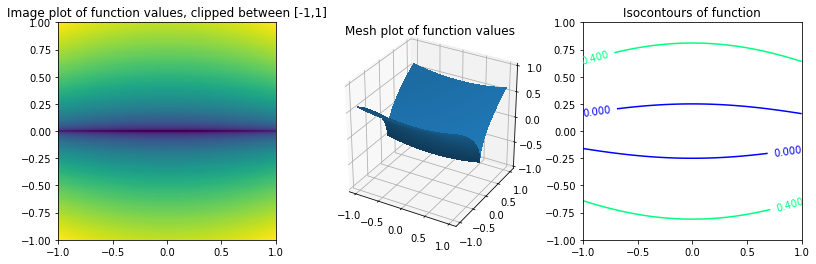

In [4]:
function_values = 0.1*X1**2 + np.sqrt(np.abs(X2)) - 0.5

visualization_func(X1, X2, function_values, contour_values=[0.0, 0.4])

### Example 2 

Generate values for $f(x_1,x_2) = \sin(2*pi*x_1)*(x_2^2 - x_1*x_2)$

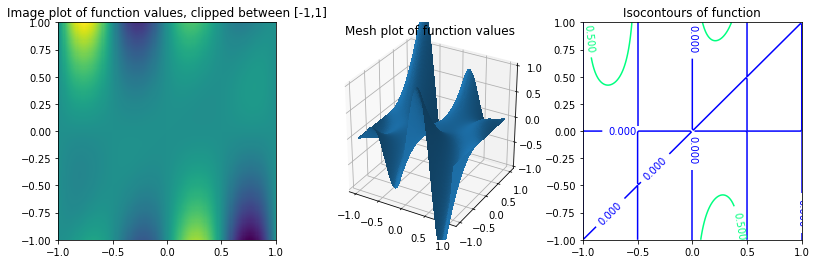

In [5]:
function_values = sin(2*pi*X1)*(X2**2 - X1*X2)

visualization_func(X1, X2, function_values, contour_values=[0.0, 0.5])

<a id='question2'></a>

## Matrix computation

### Compute function values using a nested for-loop 

[[ 5.          4.92040014  4.84159994 ...,  4.84159994  4.92040014  5.        ]
 [ 4.96019983  4.88059998  4.80180025 ...,  4.80180025  4.88059998
   4.96019983]
 [ 4.92080021  4.84120035  4.76240015 ...,  4.76240015  4.84120035
   4.92080021]
 ..., 
 [ 4.92080021  4.84120035  4.76240015 ...,  4.76240015  4.84120035
   4.92080021]
 [ 4.96019983  4.88059998  4.80180025 ...,  4.80180025  4.88059998
   4.96019983]
 [ 5.          4.92040014  4.84159994 ...,  4.84159994  4.92040014  5.        ]]
(0.48834681510925293, ' seconds have passed using a nested for-loop')


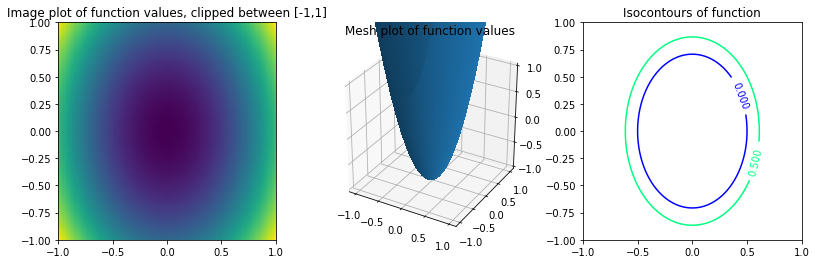

In [16]:
w = [-1, 0, 0, 4, 2, 0]

rows, cols = X1.shape

function_values = np.zeros([rows, cols], dtype=np.float32)

t = time.time()

## TODO (Question 2)

for i in range (0, 201):
    for j in range (0, 201):
        function_values [i][j] = (-1) + 4 * ((X1[i][j])**2) + 2 *((X2[i][j])**2) 
        
        #function_values [i,j] = w[0] + w[1] * X1[i][j] + w[2] * (X2[i][j]) + w[3] * ((X1[i][j])**2) + w[4] *((X2[i][j])**2) + w[5] * (X1[i][j]) * (X2[i][j])
print(function_values)

## /TODO

elapsed = time.time() - t
print(elapsed, ' seconds have passed using a nested for-loop')
        
## TODO (Question 4: tweak parameters to plot the zero set)
visualization_func(X1, X2, function_values, contour_values=[0.0, 0.5])
## /TODO

<a id='question3'></a>

### Compute using numpy operations

[[ 5.          4.92040014  4.84160042 ...,  4.84160042  4.92040014  5.        ]
 [ 4.96020031  4.88059998  4.80180025 ...,  4.80180025  4.88059998
   4.96020031]
 [ 4.92080021  4.84120035  4.76240015 ...,  4.76240015  4.84120035
   4.92080021]
 ..., 
 [ 4.92080021  4.84120035  4.76240015 ...,  4.76240015  4.84120035
   4.92080021]
 [ 4.96020031  4.88059998  4.80180025 ...,  4.80180025  4.88059998
   4.96020031]
 [ 5.          4.92040014  4.84160042 ...,  4.84160042  4.92040014  5.        ]]
(0.0017819404602050781, ' seconds have passed using numpy operations')


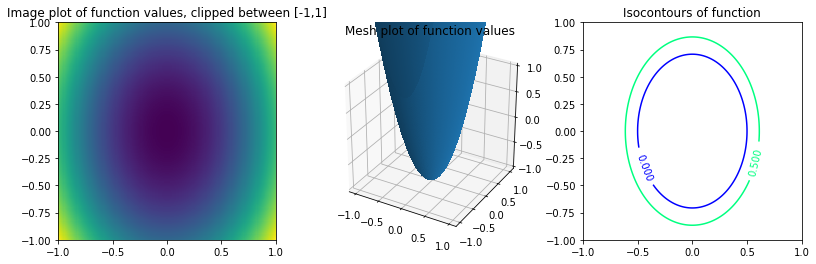

In [12]:
t = time.time()

## TODO (Question 3)

#w = np.matrix([-1, 0, 0, 4, 2, 0])
#def myfunc (i, j):
    #x1 = i/100.0 -1
    #x2 = 1 - j/100.0
    #x = np.matrix([1, x1,e x2, x1**2, x2**2, x1*x2])
    #return np.matmul(x, w.T)

#i = np.arange(0, 201, 1)
#j = np.arange(0, 201, 1)
#I, J= np.meshgrid(i, j, sparse=False)
#vfunc = np.vectorize(myfunc, otypes=[np.float32])
#function_values = vfunc (I, J)

function_values = w[0] + w[1] * X1 + w[2] * X2 + w[3] * (X1**2) + w[4] *(X2**2) + w[5] * X1 * X2
print(function_values)

## /TODO

elapsed = time.time() - t
print(elapsed, ' seconds have passed using numpy operations')

## TODO (Question 4: tweak parameters to plot the zero set)
visualization_func(X1, X2, function_values, contour_values=[0.0, 0.5])
## /TODO

<a id='question5'></a>

## Decision boundary of a classifier

### Probability function

In [19]:
def probability_func(X1, X2, m1, m2, sigma1, sigma2, class_no):
    ## TODO (Question 5)
    if class_no == 0:
        output = (1/(2 * np.pi * sigma1 * sigma2)) * exp(-((X1 - m1)**2)/(2 * (sigma1 **2)) - ((X2 - m2)**2)/(2 * (sigma2 **2)))
    else:
        output = (1/(2 * np.pi * sigma1 * sigma2)) * exp(-((X1 - m1)**2)/(2 * (sigma1 **2)) - ((X2 - m2)**2)/(2 * (sigma2 **2)))
    ## /TODO
    
    return output


#### Visualize the distribution of the first class

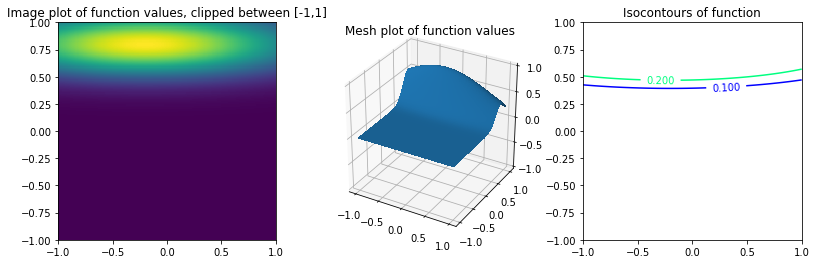

In [20]:
m0_1 = -0.2
m0_2 = 0.8
sigma0_1 = 1
sigma0_2 = 0.2

## TODO (Question 5)
class0 = probability_func(X1, X2, m0_1, m0_2, sigma0_1, sigma0_2, 0)
visualization_func(X1, X2, class0, contour_values=[0.1, 0.2])
## /TODO

#### Visualize the distribution of the second class

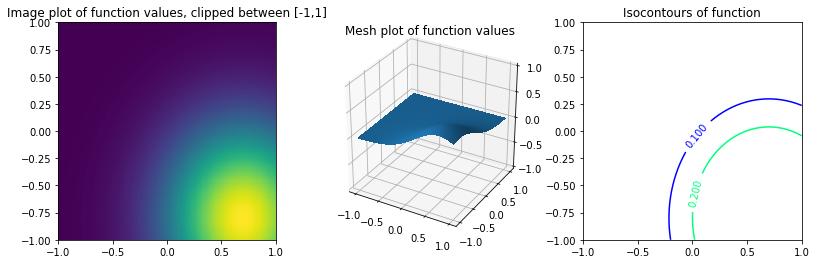

In [21]:
m1_1 = 0.7
m1_2 = -0.8
sigma1_1 = 0.5
sigma1_2 = 0.6

## TODO (Question 5)
class1 = probability_func(X1, X2, m1_1, m1_2,sigma1_1, sigma1_2, 1)
visualization_func(X1, X2, class1, contour_values=[0.1, 0.2])
## /TODO

<a id='question6'></a>

### Decision boundary function

In [22]:
def decision_boundary_function(X1, X2, prior0, class_no):

    ## TODO (Question 6)
    if class_no == 0:
        posterior1 = class0 * prior0/(class0 * prior0 + class1*(1 - prior0))
    else:
        posterior1 = class1 *(1 - prior0)/(class0 * prior0 + class1*(1 - prior0))
        
    plot = visualization_func(X1, X2, posterior1, contour_values=[0.5])
    # /TODO
    
    return plot

#### Visualize the decision boundary for $\pi_0 = 0.3$

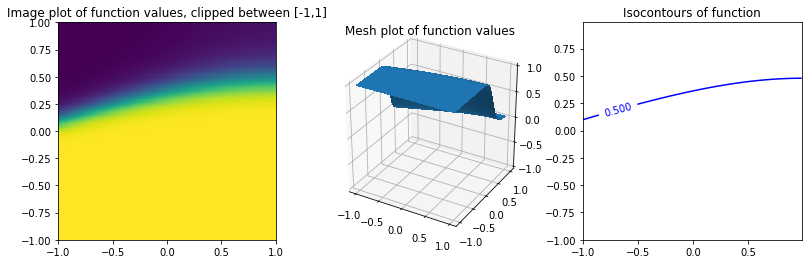

In [238]:
## TODO (Question 6)
decision_boundary_function(X1, X2, 0.3, 1)
## /TODO

<a id='question7'></a>

#### Visualize the decision boundary for $\pi_0 = 0.1$

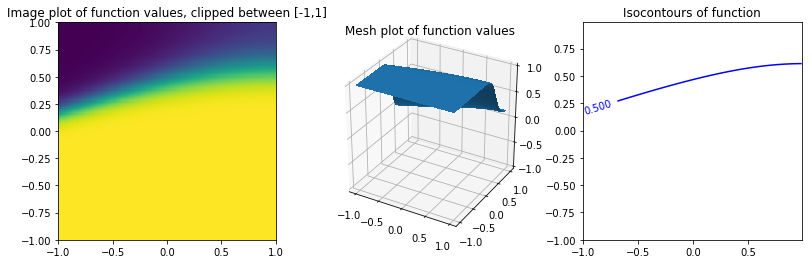

In [239]:
## TODO (Question 7)
decision_boundary_function(X1, X2, 0.1, 1)
## /TODO